## Загрузка изображения

In [1]:
import urllib

url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
urllib.request.urlretrieve(url, "image.jpg") # Download image

('image.jpg', <http.client.HTTPMessage at 0x7f080c4b0280>)

# Задание 1 Чтение и отображение

- Прочитать изображение
- Отобразить каждый канал цвета
- Отобразить гистограмму яркостей каждого канала
- Отобразить изображение


In [2]:
import cv2
from google.colab.patches import cv2_imshow

In [3]:
img = cv2.imread('image.jpg') # Load image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR → RGB

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure

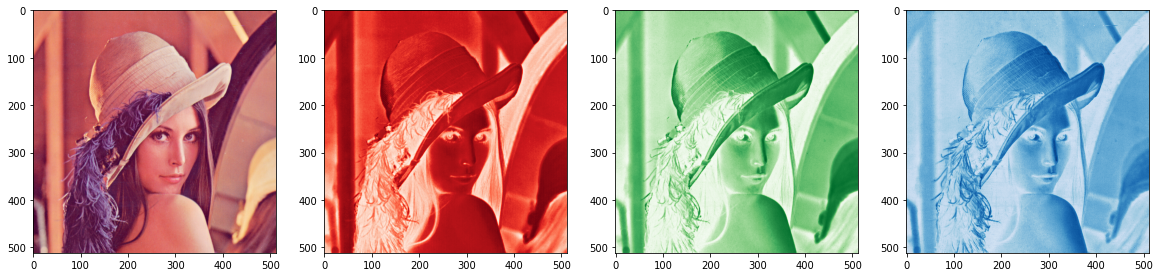

In [5]:
fig, ax = plt.subplots(1, 4, figsize=(20, 30))
ax[0].imshow(img)
ax[1].imshow(img[:, :, 0], cmap="Reds") # Red
ax[2].imshow(img[:, :, 1], cmap="Greens") # Green
ax[3].imshow(img[:, :, 2], cmap="Blues") # Blue

Красный канал показывает очень насыщенный цвет

Постороим гистограмму яркостей каналов и убедимся в этом.

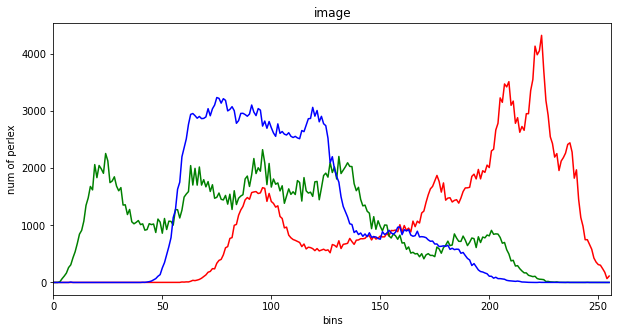

In [19]:
figure(figsize=(10, 5))
color = ("r", "g", "b")
for i, color in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.title("image")
    plt.xlabel("bins")
    plt.ylabel("num of perlex")
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

# Задание 2 Добавление границы

`add_border(image, border_size, method)`, которая добавляет границы к изображению следующими методами:
- константый цвет
- отражение
- дублирование цвета на границе


In [7]:
def add_border(image, border_size = 100, method = 'zero'):
  img = image.copy()

  if method == 'zero':
    border = cv2.BORDER_CONSTANT
  elif method == 'mirror':
    border = cv2.BORDER_REFLECT
  elif method == 'clamp':
    border = cv2.BORDER_REPLICATE

  return cv2.copyMakeBorder(src=img, top=border_size, bottom=border_size, left=border_size, right=border_size, borderType=border)

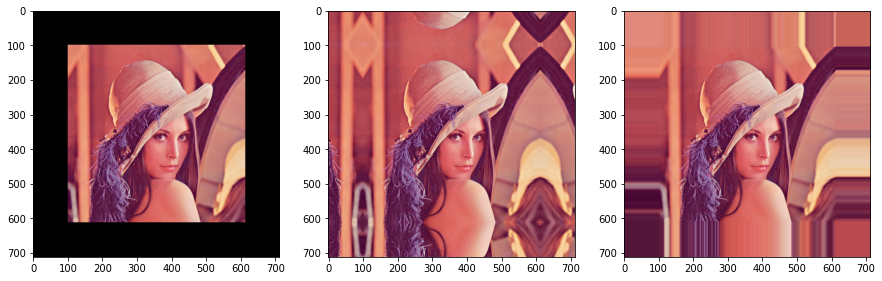

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15, 30))
ax[0].imshow(add_border(img, method="zero"))
ax[1].imshow(add_border(img, method="mirror"))
ax[2].imshow(add_border(img, method="clamp"))

# Задание 3 RGB  -> GRAY

- Имплементировать простой метод: 
`gray = (R + G + B) / 3`
- Имплементировать метод:
`gray = 0.299*R + 0.587*G + 0.114*B`
- Используйте встроенную функцию opencv
- Отобразить результаты


In [9]:
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

In [10]:
gray_average_1 = (R + G + B) / 3
gray_average_2 = (R/3 + G/3 + B/3)

In [11]:
gray_formula = 0.299*R + 0.587*G + 0.114*B

In [12]:
gray_opencv = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

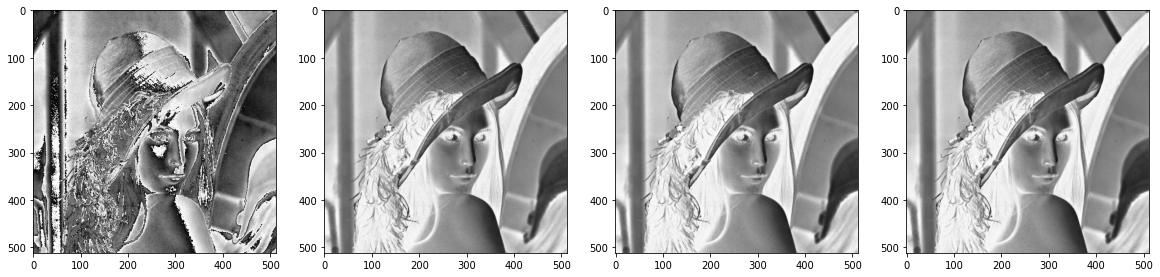

In [13]:
fig, ax = plt.subplots(1, 4, figsize=(20, 30))
ax[0].imshow(gray_average_1, cmap="Greys")
ax[1].imshow(gray_average_2, cmap="Greys")
ax[2].imshow(gray_formula, cmap="Greys")
ax[3].imshow(gray_opencv, cmap="Greys")

# Задание 4 Манипуляция с пикселями

- Имплементируйте функцию `shift_image(image, channel, val)`, которая изменяет выбранный канал channel в val раз (0-2) и отобразите результат применений при разных параметрах
- Имплементируйте функцию `get_rect(image, rect_coord, color)` которая извлекает прямоугольник из изображения и заменяет его на изображении константным цветом. Функция возвращает прямоугольник и измененное изображение.


In [14]:
import numpy as np

In [15]:
def shift_image(image, channel, val):
  img = image.copy()

  channels = {'r': 0,
              'g': 1,
              'b': 2}

  if (np.max(img[:, :, channels[channel]])*val < 255): # Если после умножения на val мы не получим число больше 255, умножаем значения канала на val
    img[:, :, channels[channel]] = img[:, :, channels[channel]] * val
  else: # Иначе мы получим число больше 255, в тамком случае умножаем значения нецелевого канала на 1/val
    for i in [0, 1, 2]:
      if (i != channels[channel]):
        img[:, :, i] = img[:, :, i] * (1/val)
        img[:, :, i] = img[:, :, i] * (1/val)

  return img

def get_rect(image, rect_coord, color):
  img = image.copy()

  x = (rect_coord[0][0], rect_coord[1][0])
  y = (rect_coord[0][1], rect_coord[1][1])

  x_min, x_max = min(x), max(x)
  y_min, y_max = min(y), max(y)

  for i in range(3):
    img[x_min:x_max, y_min:y_max, i] = color[i]

  return img

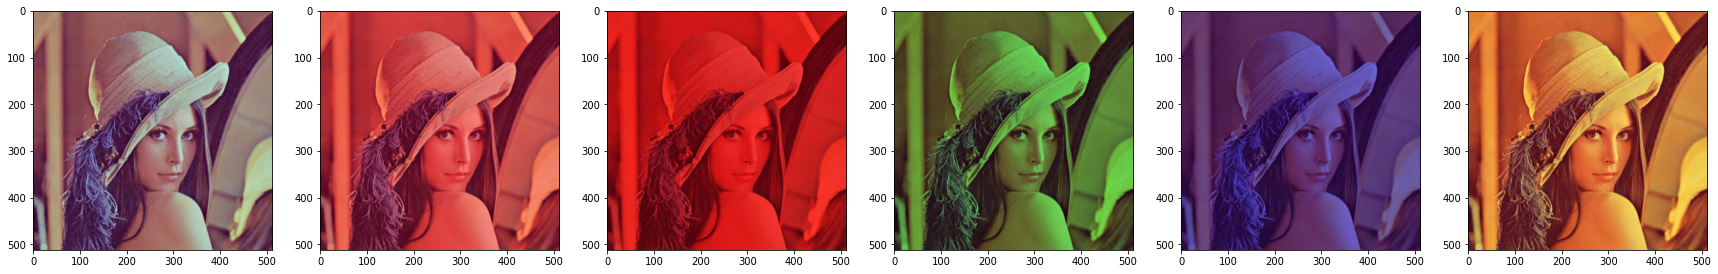

In [16]:
fig, ax = plt.subplots(1, 6, figsize=(30, 30))
ax[0].imshow(shift_image(img, 'r', 0.75))
ax[1].imshow(shift_image(img, 'r', 1.25))
ax[2].imshow(shift_image(img, 'r', 2))
ax[3].imshow(shift_image(img, 'g', 1.5))
ax[4].imshow(shift_image(img, 'b', 1.5))
ax[5].imshow(shift_image(img, 'b', 0.5))

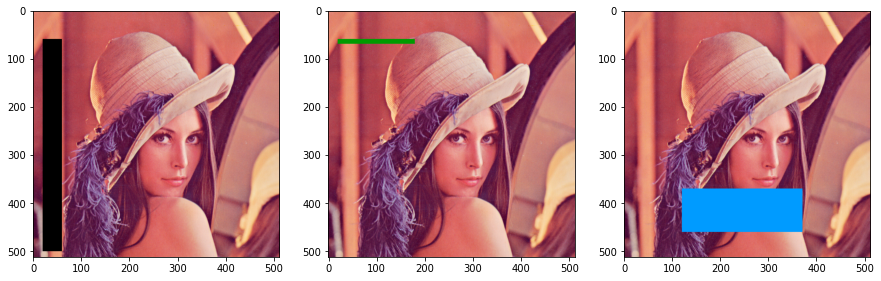

In [17]:
fig, ax = plt.subplots(1, 3, figsize=(15, 30))
ax[0].imshow(get_rect(img, ((500, 20), (60, 60)), (0, 0, 0)))
ax[1].imshow(get_rect(img, ((70, 180), (60, 20)), (0, 155, 0)))
ax[2].imshow(get_rect(img, ((370, 370), (460, 120)), (0, 155, 255)))

# Задание 5 RGB -> HSV

- Преобразовать изображение из RGB в  HSV
- Использовать `shift_image()` на конвертированном изображении
- Перевести в rgb и отобразить результаты


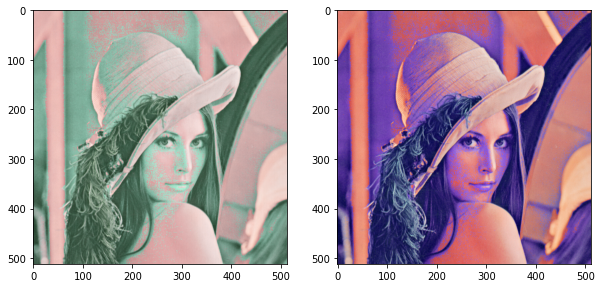

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(10, 30))

img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img_hsv = shift_image(img_hsv, 'b', 1.5)
img_shifted_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
ax[0].imshow(img_shifted_hsv)

img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
img_hsv = shift_image(img_hsv, 'r', 0.75)
img_shifted_hsv = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
ax[1].imshow(img_shifted_hsv)